In [ ]:
! pip install -qU huggingface_hub
! pip install -qU diffusers
! pip install -qU torch

In [7]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
import uuid
import textwrap
import matplotlib.pyplot as plt

In [ ]:
base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_8step_unet.safetensors"

unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

In [11]:
def run_and_show(prompts):
    images_per_row = 4
    total_images = len(prompts)
    rows_needed = (total_images + images_per_row - 1) // images_per_row

    fig_width = 24
    fig_height_per_row = 6
    plt.figure(figsize=(fig_width, rows_needed * fig_height_per_row))

    for i, prompt in enumerate(prompts):
        image = pipe(prompt, num_inference_steps=8, guidance_scale=0).images[0]
        file_name = f"{uuid.uuid4().hex}.png"
        image.save(file_name)
        plt.subplot(rows_needed, images_per_row, i+1)
        plt.imshow(image)
        wrapped_text = textwrap.fill(prompt, width=50)
        plt.title(wrapped_text, fontsize=10, pad=10)
        plt.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

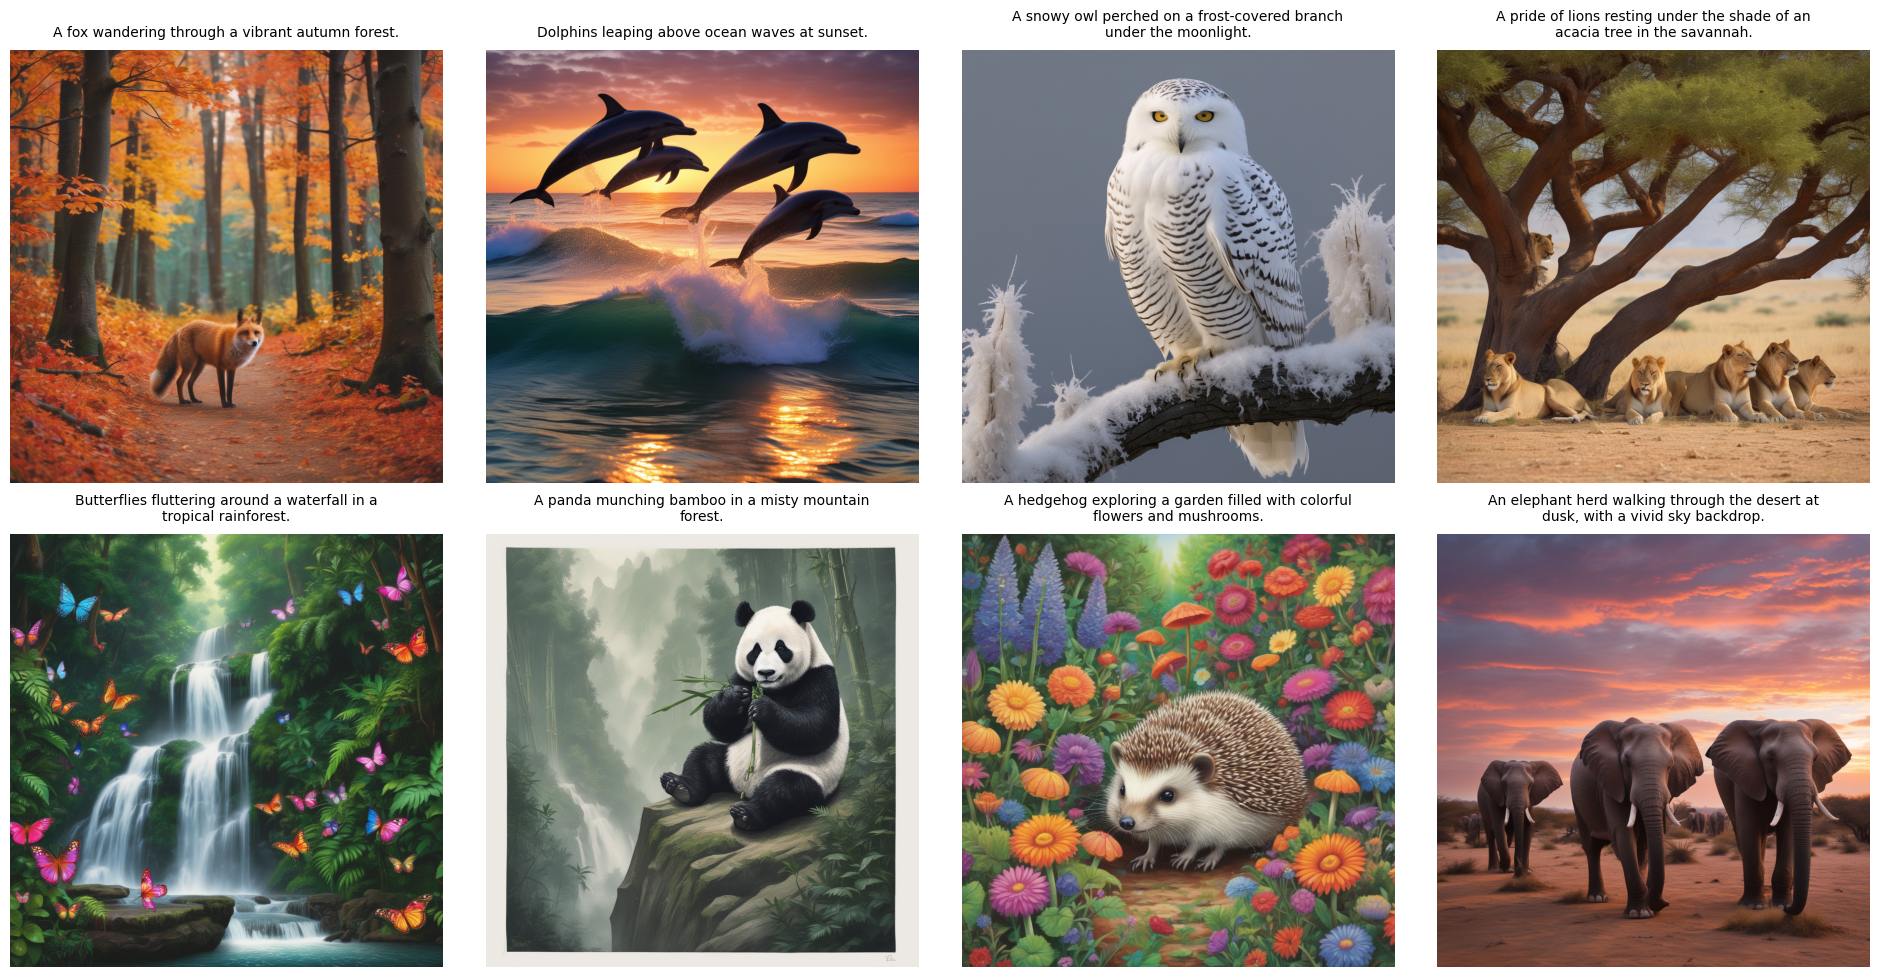

In [10]:
prompts = [
"A fox wandering through a vibrant autumn forest.",
"Dolphins leaping above ocean waves at sunset.",
"A snowy owl perched on a frost-covered branch under the moonlight.",
"A pride of lions resting under the shade of an acacia tree in the savannah.",
"Butterflies fluttering around a waterfall in a tropical rainforest.",
"A panda munching bamboo in a misty mountain forest.",
"A hedgehog exploring a garden filled with colorful flowers and mushrooms.",
"An elephant herd walking through the desert at dusk, with a vivid sky backdrop.",
]
run_and_show(prompts)